# Exploratory Visualization on Ford GoBike Service Data 
## in SF Bay area (2-2019)
#### Yasser Gharib

### Table of Contents
<ul>
<li><a href="#inv">Investigation Overview</a></li>
<li><a href="#ds">Dataset Overview</a></li>
<li><a href="#clr">Data Cleansing</a></li>
<li><a href="#der">Derive Data</a>
<li><a href="#vis">Visualizing Data</a><ul>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#mult">Multivariate Exploration</a></li>
    </ul></li>
<li><a href="#wrangle">Conclusion</a></li>
<li><a href="#wrangle">References</a></li>
</ul>


<a id='inv'></a>
<B>Investigation Overview</B><p>
<ul><li>Bike-sharing service like "Ford GoBike" is one of the rapidly growing transport services around the world, it has gained popularity in major cities across the globe. They allow people in metropolitan areas to rent bicycles for short trips usually within 30 minutes. Ford GoBike has collected a rich amount of data for this bicycle-sharing service from its electronic system in datasets. each dataset includes information about individual rides made in a bikeshare system covering a city for certain time.</li><p>
<li>In this project, an python exploratory visualization analysis is performed on the "Ford GoBike" dataset to figureout the relationship between riders featurs, and trips taken features like when (time periods), where (locations) and why are most trips taken.</li><p>
<li>Python visualization techniques is used to figure out what is the most influential power variables possess on the bike sharing service.</li></ul>

<a id='ds'></a>
<b>Dataset Overview </b><p>
<ul><li>The project Dataset is provided by Ford GoBike sharing service at the greater San Francisco Bay area for ONE month (February 2019) which have thousands of bikes and trips features available. it’s the most fun, convenient, and affordable way to explore the region.</li></ul>

<b>Setup Environment</b>
<ul>
<li>Initialization</li>
<li>Set visualization style</li>
<li>Read data</li>
<li>Dataset Structure</li>
<ul><li>This data set includes information about individual rides made in a bikeshare system covering the greater San Francisco Bay area for ONE month (February 2019) with 183,412 trips and 16 features.</li></ul>

<li>Examine DataFrame</li>

### Setup Environment

#### Initialization 

In [340]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10)

#### Set visualization style 

In [341]:
sb.set_style('whitegrid')
sb.set_context("talk")

####  Read data

In [342]:
# Import Ford GoBike csv file into jupyter notebook
df = pd.read_csv('201902-fordgobike-tripdata.csv')

####   Dataset Structure

In [343]:
# Find out the structure of the dataset

#print(df.shape)


This data set includes information about individual rides made in a bikeshare system covering the greater San Francisco Bay area for ONE month (February 2019) with 183,412 trips and 16 features.

#### Examine DataFrame

In [344]:
#Examine DataFrame
#print(df.info())

In [345]:
#print(df.head(4))

<b>The 16 Features:</b>
<ul><LI>duration_sec: This has been given to us in seconds. A more natural unit of analysis will be if all the trip durations are given in minutes.</LI>
<LI>start_time, end_time: The time variables are for one month (February 2019), it is string, so for the analysis,it need to convert to datetime format and broken down into time of day, day of the week. We'll use start_time and durations only  (end_time to calculate duration which i alrady have it)</LI>
<LI>The dataset provides membership birth year, so ages can be derived by using the year of the dataset, 2019, minus the membership birth year.    </LI>
<LI>start_station_id, end_station_id: it is float64, it tell use the start and end stations id for each trip.</LI>
<LI>start_station_name, end_station_name: it tell use the start and end stations name for each trip.    </LI>
<li>(start_station_latitude,	start_station_longitude) (end_station_latitude,end_station_longitude) that for putting the start station and end one on map or GIS, google map or calculate the stright line distant between  start and end station (we'll not use it).</li>
<li>bike_id: int64,it is id No., telling which bike is used (we may use sum of duration time for each bick for maintance schaduale)</li>
<LI>user_type: The data uses 'Subscriber' and 'Customer'.</LI>
<LI>member_birth_year : float64, The dataset provides membership birth year, so ages can be derived by using the year of the dataset, 2019, to divide by the membership birth year.</LI>
<LI>member_gender: Male vs. Female vs. Others.</LI><LI>bike_share_for_all_trip: yes/no , tell use the bick ability to share for all trip or not.</LI></ul>


<b>All features for the Trip like: start_time, end_time, duration_sec, start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude,end_station_longitude, which bick in bike_id <p>but some for the bick like: bike_id, bike_share_for_all_trip <p>and other for user like: user gender (member_gender), age (member_birth_year), user_type</b>

<b>What is the main interesting dataset features that support the investigation?<p>
in this dataset,</b><p> The most interested features will include:<ul><li>Pick featues (start time/location, end time/location and duration)</li><li>with Riders characteristics (age, gender, and user_type) </li><li>in figuring out the questions answer of <b>when?, where? and why?</b> most trips are taken.

<a id='clr'></a>
### Data Cleansing

#### Updating data types

In [346]:
# Convert time variables from string to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

#### Checking for missing values and duplicates

In [347]:
# Find Missing Values columns (features) and show Counts of NaN on that Column:
#print(df.isna().sum(axis = 0))


In [348]:
# Assessing missing values in columns with missing values: member_birth_year, member_gender.
# in percentage of missing values. Both features are key to our analyses.

def show_features_missing_perc(df):
  '''Return a DF of Features with missing value percentage (perc) '''
  df_missing_rows_mean = (df.isna().mean(axis = 0) * 100).sort_values(ascending=False)
  return df_missing_rows_mean[df_missing_rows_mean != 0].round(3)

## Show percentages of missing values on features:
df_missing_rows_perc = show_features_missing_perc(df)

In [349]:
## Strucuture the missing features markup string:
missing_features = [i for i in df_missing_rows_perc.index]

missing_features_markstr = ""
for missing_feature in missing_features:
  missing_features_markstr += "`{}`, ".format(missing_feature)
# print(missing_features_markstr)

## View missing features and the missing value percetage:
df_missing_rows_perc

member_gender         4.506
member_birth_year     4.506
end_station_name      0.107
end_station_id        0.107
start_station_name    0.107
start_station_id      0.107
dtype: float64

In [350]:
# number of Missing Values rows

print('Number of Missing Values rows is '+
                      str(df[df.isnull().any(axis=1)].shape[0])
      + ' from ' + 
                       str(df.shape[0])      
      +  ' rows,  ie: ' +
                        str(df[df.isnull().any(axis=1)].shape[0]/df.shape[0]*100)+'%')


Number of Missing Values rows is 8460 from 183412 rows,  ie: 4.612566244302445%


#### Missing values were found in 6 features:
member_gender, member_birth_year, start_station_id, start_station_name, end_station_id, end_station_name.

In [351]:
#df.describe().round(2)

#### Drop missing data row due to low % (4.61%)

#### Check if duplicates exist:

In [352]:
# Check if duplicates exist:
#df.duplicated().sum() 

##### No duplicates exist

In [353]:
df=df.dropna()
# check the data 
#df.shape

#### for any Sckew chart, Transformation to like Normal Distribution will be done.

#### Data Cleansing
<ul>
<li>Updating data types</li>
<li>Checking for missing values and duplicates</li>
    <uL><li>Number of Missing Values rows is 8460 from 183412 rows,  ie: 4.612566244302445%</li>
        <li>Missing values were found in 6 features:</li>
        <uL>
            <li>member_gender, member_birth_year, start_station_id, start_station_name, end_station_id, end_station_name.</li>
        </ul>
            <li>Drop missing data row due to low % (4.61%)</li></ul>
    <li>Check if duplicates exist:
   <uL> <li>No duplicates exist</li></uL>
        </Li>
<li>For any Sckew chart, Transformation to like Normal Distribution will be done.</li>

</ul>

<a id='der'></a>
## Deriven Data

<li><B>Generate new field for day period (time period)  from `start_time` 

In [354]:
# Morning, Afternoon or night of a day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
#print(df['start_hour'].value_counts())

In [355]:
df['period_day'] = 'Morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'Afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'Night'
#period_day_palette = {'Morning':'blue', 'Afternoon':'green','Night':'red'}
#print(df['period_day'].value_counts())
#print(df['period_day'])

<li><B> Generate new field for Week Day from `start_time` 

In [356]:
# Week Day
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)
#print(df['start_weekday_num'].value_counts())
#print(df['start_weekday_char'].value_counts())
week_palet= {'Subscriber':'blue', 'Customer':'green'}

<li><B> for visualization, Order of time period, and weekday

In [357]:
# convert time period, and weekday into ordered categorical types
ordinal_var_dict = {'period_day': ['Morning', 'Afternoon', 'Night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

<li><B> for visualization wise, more  Generating  for new field will be done in its place.

### Filter data to include reasonable member age range

In [358]:
# User ages
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)
#df['age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

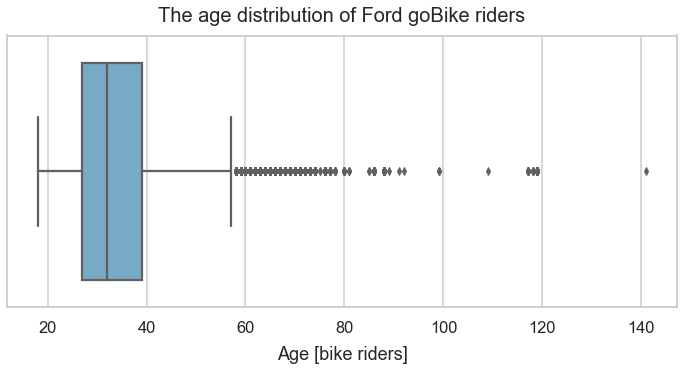

In [359]:
plt.figure(figsize=(12,5));
sb.boxplot(x='age',  data=df, palette='Blues', orient='h');
plt.title("The age distribution of Ford goBike riders", fontsize=20, y=1.03);
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10);
#plt.savefig('image01.png');

There are outliers. Age from 18 to 55 takes 95% of the users. So, it's logical to remove users more than 60 years old. There were users more than 100 years old.

In [360]:
df = df[df['age']<=60]
df['age'].mean()

33.523386729824644

The Ford bike users' median user age is around 33~34.

### Working with The most stations trips or with all station  are better?

In [361]:
# start stations: 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         3626
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3314
Berry St at 4th St                                           2880
Montgomery St BART Station (Market St at 2nd St)             2667
Powell St BART Station (Market St at 4th St)                 2568
                                                             ... 
Willow St at Vine St                                            8
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

<li><b>Start stations: there are 329 with different trafics.</b>

<li><b>The most trafic station (the first 7 station on the graph) will be used in this invistigation project.</b>

<li><b>Subset the dataset by keeping only top 7 locations with high trips</b>

In [362]:
# Subset the dataset by keeping only top 7 locations with high traffics, dftops. 
locs = df['start_station_name'].value_counts().index.tolist()[0:7]
dftops = df.loc[df['start_station_name'].isin(locs)]
dftops['start_station_name'].value_counts()

Market St at 10th St                                         3626
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3314
Berry St at 4th St                                           2880
Montgomery St BART Station (Market St at 2nd St)             2667
Powell St BART Station (Market St at 4th St)                 2568
San Francisco Caltrain (Townsend St at 4th St)               2489
San Francisco Ferry Building (Harry Bridges Plaza)           2467
Name: start_station_name, dtype: int64

In [363]:
StStatn_counts = dftops['start_station_name'].value_counts()
StStatn_order = StStatn_counts.index

<li><b>Keeping only top 7 locations with high trips</b>

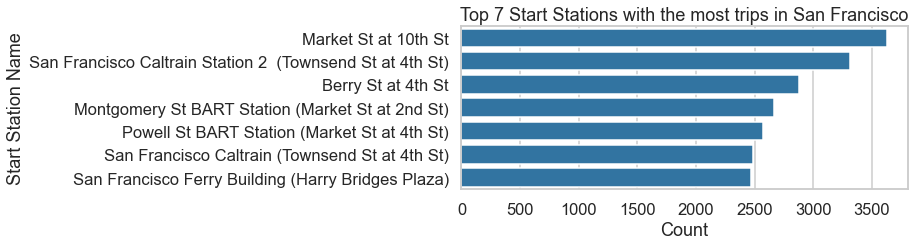

In [364]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(8,3))
sb.countplot(data=dftops, y='start_station_name', color=base_color, order=StStatn_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 7 Start Stations with the most trips in San Francisco');
#plt.savefig('image04.png');

In [365]:
# Subset the dataset by keeping only top 7 locations with high traffics end stations, dftope. 
loce = df['end_station_name'].value_counts().index.tolist()[0:7]
dftope = df.loc[df['end_station_name'].isin(loce)]
dftope['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4552
Market St at 10th St                                         3676
Montgomery St BART Station (Market St at 2nd St)             3397
San Francisco Ferry Building (Harry Bridges Plaza)           3038
Powell St BART Station (Market St at 4th St)                 2801
San Francisco Caltrain (Townsend St at 4th St)               2771
Berry St at 4th St                                           2724
Name: end_station_name, dtype: int64

In [366]:
EdStatn_counts = dftope['end_station_name'].value_counts()
EdStatn_order = EdStatn_counts.index

## Where and Why most trips are taken?

 After checking the top (most trips) 7 start and end stations in San Francisco are taken becouse this most stations were connect to public transportations such as CalTrain, Metro (Berry) stations , Ferry building and Market Street.
<p> The top (most trips) 7 start and end stations are looks like the same,
<p> So the invistigation will be on the top 7 start station which are the most interested in the most traffic locations with over 2,500 trips:      
<ul>
    <li>Market St at 10th St</li>
<li>San Francisco Caltrain Station 2 (Townsend St at 4th St)</li>
<li>Berry St at 4th St</li>
<li>Montgomery St BART Station (Market St at 2nd St)</li>
<li>Powell St BART Station (Market St at 4th St)</li>
<li>San Francisco Ferry Building (Harry Bridges Plaza)</li>
<li>San Francisco Caltrain (Townsend St at 4th St)</li>
    </ul>

<a id='vis'></a>
# Visualizing Data

# When the most trips are taken?¶

<a id='uni'></a>
## Univariate Exploration¶

#### by looking into the start time and start location of this dataset.

#### The distribution of  time of day, weekday after subsetting, regenerate:

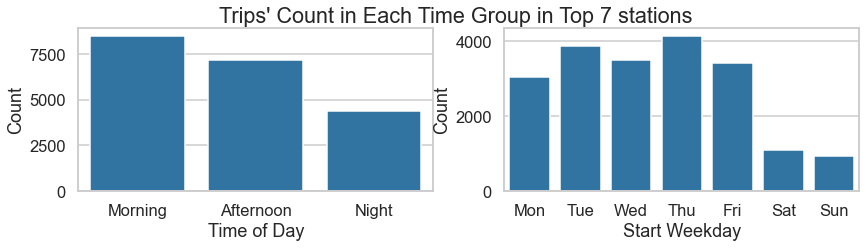

In [367]:
fig, ax = plt.subplots(ncols=2, figsize = [14,3])
default_color = sb.color_palette()[0]
sb.countplot(data = dftops, x = 'period_day', color = default_color, ax = ax[0])
sb.countplot(data = dftops, x = 'start_weekday_char', color = default_color, ax = ax[1])
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Start Weekday')
ax[1].set_ylabel('Count')
fig.suptitle('Trips\' Count in Each Time Group in Top 7 stations');
#plt.savefig('image06.png');

#### In these top 7 trips stations, base on the above figures, we found:
<ul><LI>During the day, there are more trips in the morning and afternoon than the night. It probably because of rush hours. Also, the number of trips in the afternoon is slightly less than the morning and beger than night. may be bick riders go in the morning and come back home in afternoon, and might not be back in the night.</li>
<LI>It makes sense that there are more trips during the weekdays and less trips during the weekends because of working schedule.</li></ul>

## The  Duration of trips Distribution

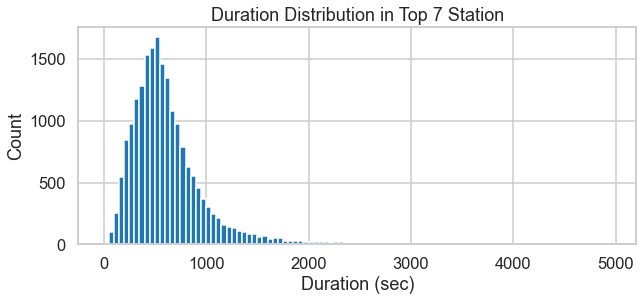

In [368]:
# The distribution of duration of trips
plt.figure(figsize=(10,4))
bins = np.arange(0, 5000, 50)
plt.hist(data=dftops, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution in Top 7 Station');
#plt.savefig('image07.png');

#### Long tail in the distribution

In [369]:
dftops['duration_sec'].describe()

count    20011.000000
mean       717.341562
std       1733.953993
min         61.000000
25%        393.000000
50%        551.000000
75%        758.000000
max      84548.000000
Name: duration_sec, dtype: float64

#### there's a long tail in the distribution, so let's put it on a log scale instead

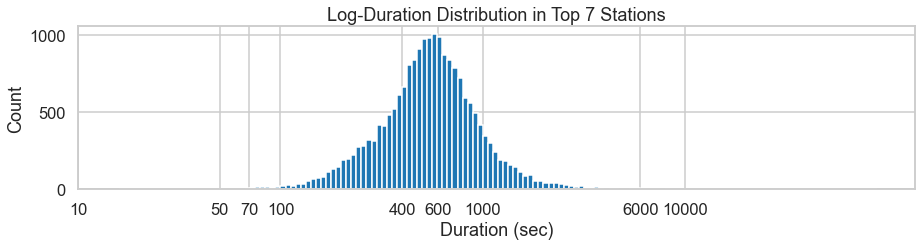

In [370]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(dftops['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[15, 3])
plt.hist(data = dftops, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,400,600,1000,6000,10000], [10,50,70,100,400,600,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Log-Duration Distribution in Top 7 Stations');
#plt.savefig('image08.png');

#### From the figure, most durations of trips fall into 600 seconds (10.0 minutes). It looks normally distributed.

### The Relationship between user features and the most trips are taken features:¶

#### User's characteristics:
<UL><LI>the distributions of user type and gender</LI></UL>


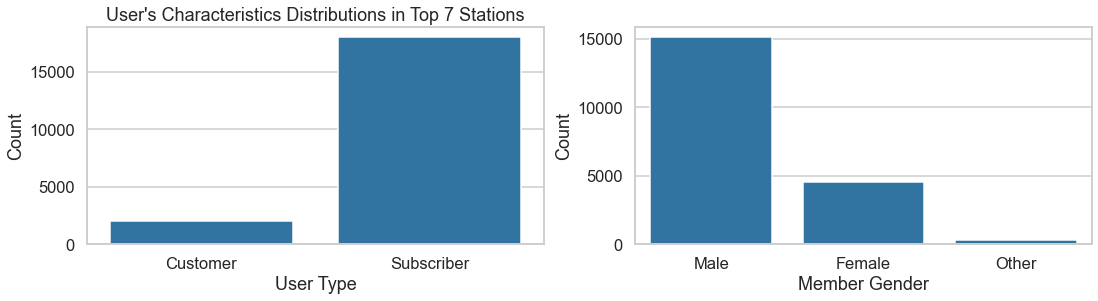

In [371]:
# User's characteristics: the distributions of user type and gender
fig, ax = plt.subplots(ncols=2, figsize = [18,4])
default_color = sb.color_palette()[0]
sb.countplot(data = dftops, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = dftops, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('User\'s Characteristics Distributions in Top 7 Stations');
#plt.savefig('image09.png');

#### In these top 7 trips stations, base on the above figures, we found:
<ul><li>From priveise notes in Time Group, makes sense that the user is using bick every day and the top trips around the public transportion, so we found more subscribers than customers.becouse subscribers is low in cost.
<li>For the gender groups, the number of trips in male users is 4 times more than the number of trips in females.
<li>There are few bick users with 'Other' gender. It's not clear that the bick users are not willing to reveal or there are data entry issues, we will keep them in the dataset.</ul>

### Age: based on the distribution

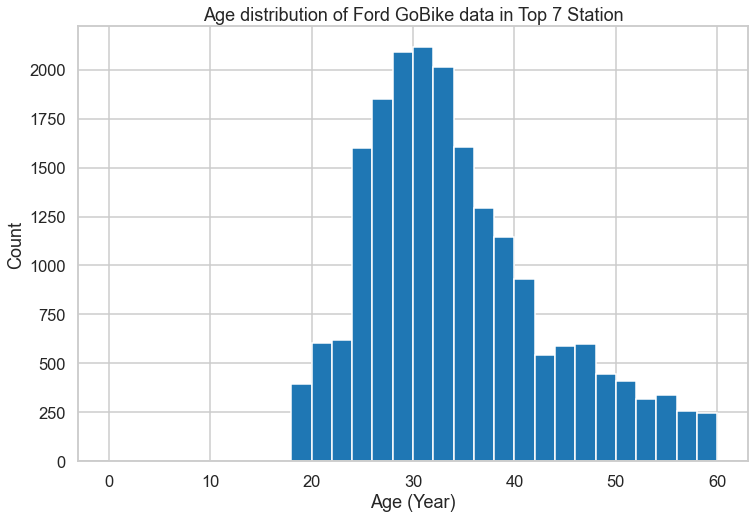

In [372]:
# Age: based on the distribution
plt.figure(figsize=(12,8))
bins = np.arange(0, dftops['age'].max()+2, 2)
plt.hist(data=dftops, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 7 Station');
#plt.savefig('image10.png');

 #### It's right skewed.

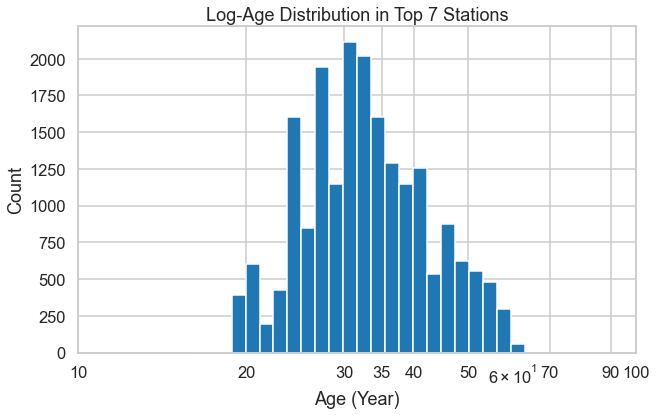

In [373]:
# there's a long tail in the distribution, so let's put it on a log scale instead
logbinsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(dftops['age'].max())+logbinsize, logbinsize)
plt.figure(figsize=[10,6])
plt.hist(data = dftops, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Log-Age Distribution in Top 7 Stations');
#plt.savefig('image11.png');

<uL><li> <b>From the figure, most of bick users are around 30 years old.</li></uL>

### Transformations
The variables, age and duration_sec, have different types of <B>skew</B>, by using log transformat to be like <B>Normal Distribution</B>,
<li>age's data has one big peak between 25 and 40 years old and some small peak. 
<li>Duration's data have one peak between 550 and 650 seconds.

<a id='bi'></a>
## Bivariate Exploration¶

In [374]:
# Prepare lists of numeric variables and categorical variables
numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char']
users_chr = ['user_type','member_gender']

In [375]:
# Order top 7 stations from the number one (most trips) to the number seven (least trips)
loc_cl = locs 
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
dftops['start_station_name'] = dftops['start_station_name'].astype(loc_cl2)

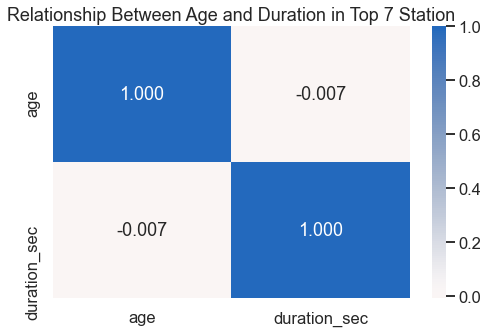

In [376]:
# Numeric variables: correlation between age and duration second
plt.figure(figsize = [8, 5])
sb.heatmap(dftops[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration in Top 7 Station');
#plt.savefig('image12.png');

##### Plot matrix for age and duration (sample 500 so that plots are clearer.)


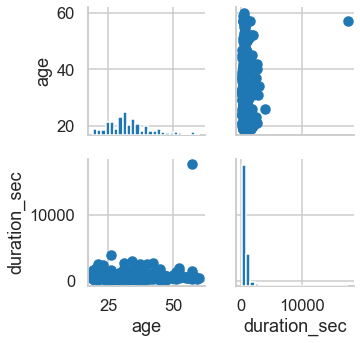

In [377]:
# plot matrix for age and duration: sample 500 so that plots are clearer. 
ss = np.random.choice(dftops.shape[0], 500, replace = False)

dftops_samp = dftops.iloc[ss,:]

g = sb.PairGrid(data = dftops_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 25)
g.map_offdiag(plt.scatter)
g.fig.suptitle('');
#plt.savefig('image13.png');

Based on the correlation, age is slightly negative correlated with duration, ie. age and duration is negatively correlated. in this dataset, the major population of age is between 30 and 40 years old and  We have less samples in the older population.

##### Categorical variables by plotting countplot: top 7 stations by times (time of day, weekdays)

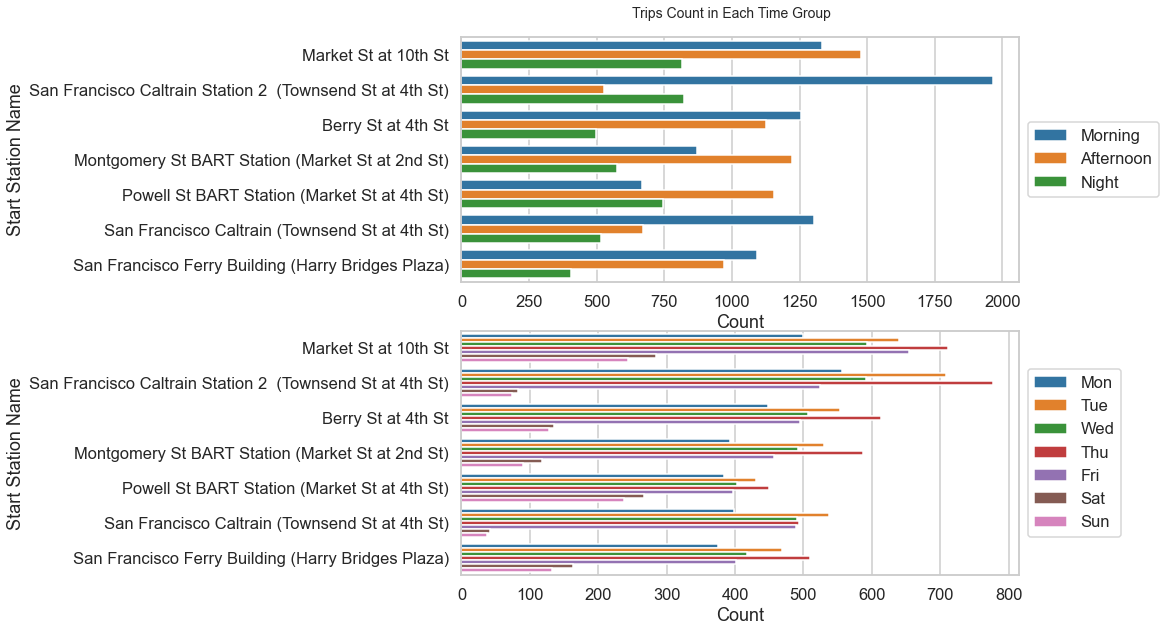

In [378]:
# Categorical variables by plotting countplot: top 7 stations by times (time of day, weekdays)
fig = plt.figure(figsize=(10,14))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(3, 1, i)
    sb.countplot(data=dftops, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');
#plt.savefig('image14.png');

After breaking down into each station,
<ul>
<li>Time of day: morning is not necessary the period of time with most trips. 4 stations have the most trips during the morning and another 3 stations has the most trips during the afternoon. It needs to be investigated more.
</li><li>Day of week: weekdays (Monday, Tuesday, Wednesday, Thursday and Friday) have the most trips than weekends. Compared to other weekdays, Sunday has less trips and  Some stations' weekends have more trips than other stations (even their trips are still less than weekdays') might because these stations are close to tourist attractions. But all of points need to be taken a deeper look.</li> </ul>

##### Categorical variables by plotting countplot: top 7 stations by users' attributes (user_type, member's gender)

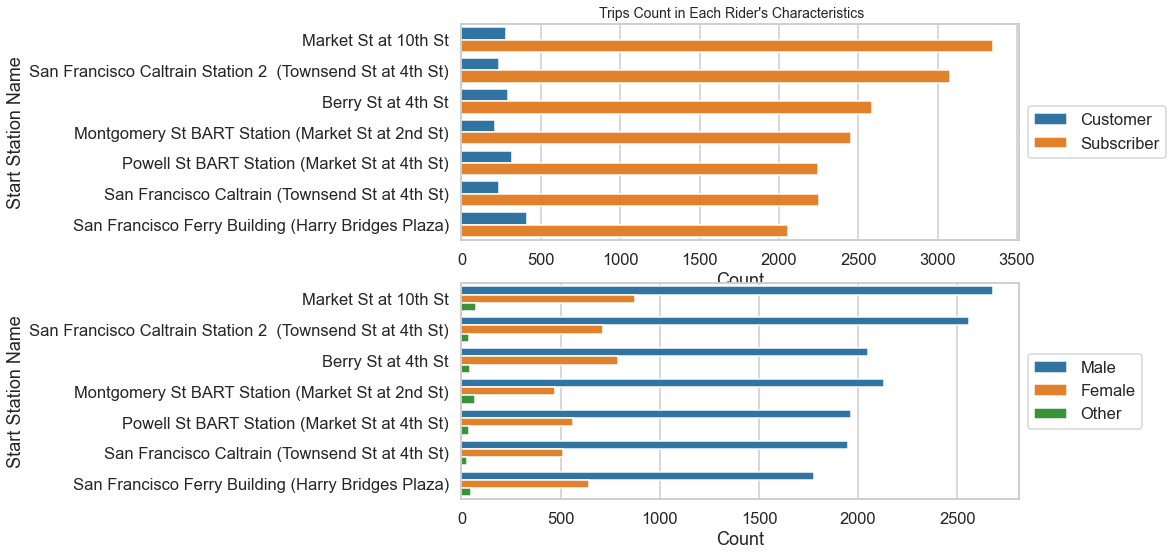

In [379]:
# Categorical variables by plotting countplot: top 7 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=dftops, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');
#plt.savefig('image15.png');

After breaking down into top 7 station by users' attributes:

<ul><li>Subscribers are more than Customers in each station. However, there are more customers at San Francisco Ferry Building (Harry Bridges Plaza). Customers might include tourists.</li>
<li>The trips in male users are way more than in females. Even though I look into the gender distribution in SF. It cannot explain why males users are more. It needs to be investigated deeper.</li></ul>

### Observed relationships in bivariate exploration.

In the top 7 stations, look into the attributes' times:
<ul><li>After separating into 7 stations, there are more trips in the morning and afternoon than the night. the number of trips in the afternoon is slightly less than the morning and beger than night.
</li><li>It makes sense that there are more trips during the weekdays and less trips during the weekends because of working schedule.</li></ul>

In the top 7 stations, look into the attributes' times and users:

1.Time:
<ul><li>After separating into 7 stations, there are more trips in the morning and afternoon than the night. the number of trips in the afternoon is slightly less than the morning and beger than night.
</li><li>It makes sense that there are more trips during the weekdays and less trips during the weekends because of working schedule.</li></ul>

2.User:
<ul><li>Age: most of age population falls between 30 and 40 years old. It might imply there are full time employees and commuters.
</li><li>Gender: the number of trips in males is way more than the number in females. It needs to be investigated more.
</li><li>Subscribe: the number of trips in subscribers is more than the number in customers because of pricing and population.</li></ul>

<a id='mult'></a>
## Multivariate Exploration¶

The most interesting variables are in locations and time with most trips. Now, we 'll study the effects and trends after adding third or more variables.

In [380]:
# Top 7 trip stations by times: separate user types and take a look customers and subscribers individually
df_cust = dftops.query('user_type == "Customer"')
df_sub = dftops.query('user_type == "Subscriber"')

<b>3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers</b>

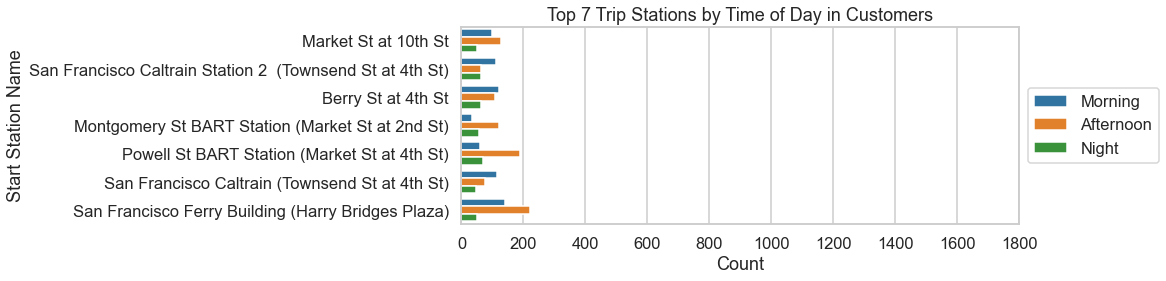

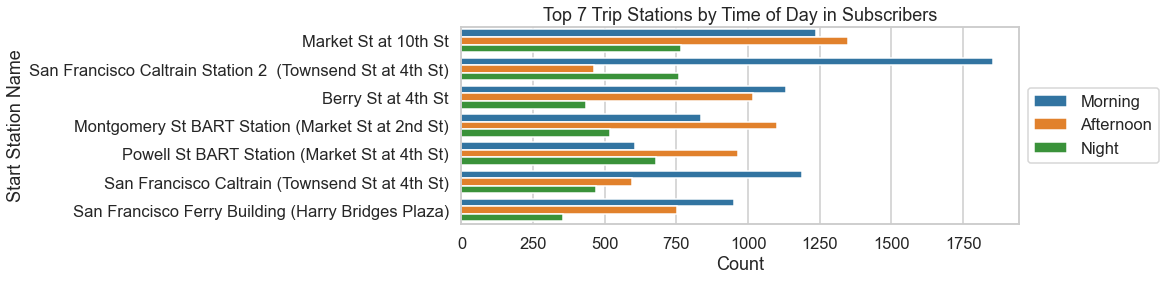

In [381]:
# 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.xlim([0, 1800])
plt.ylabel('Start Station Name')
plt.figure(figsize=(10,8))
ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');
#plt.savefig('image18.png');

Time of Day: there are more trips in the morning or afternoon no matter in customers or subscribers.

After separating customers from subscribers, there are some very interesting findings in these 3 time categorical variables.
<ul>
<li>Time of Day: there are more trips in the morning or afternoon no matter in customers or subscribers.

#### 3 categorical variables using countplot: Weekday between customers and subscribers

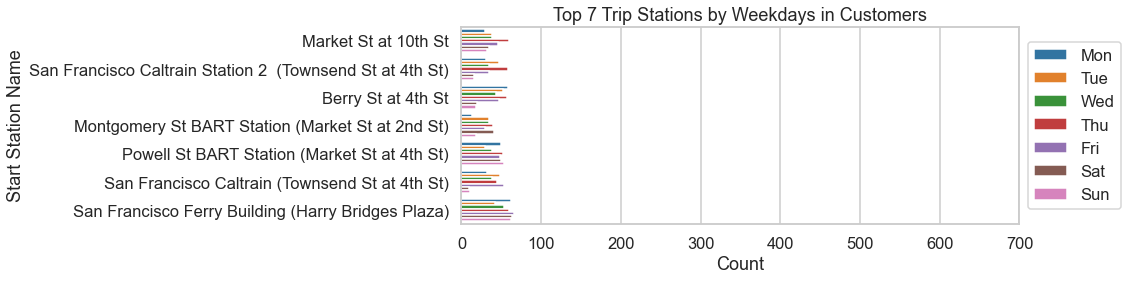

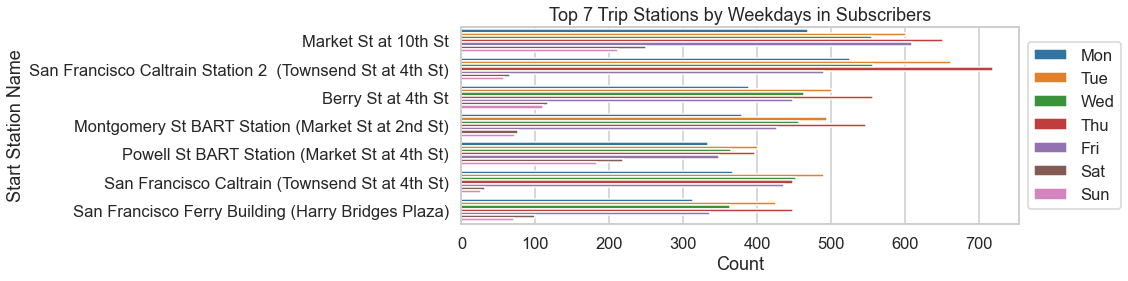

In [382]:
# 3 categorical variables using countplot: Weekday between customers and subscribers
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekdays in Customers')
plt.xlim([0, 700])
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.figure(figsize=(10,8))
ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekdays in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');
#plt.savefig('image20.png');

After separating customers from subscribers, there are some very interesting findings in these 3 time categorical variables.
<ul>
<li>Time of Day: there are more trips in the morning or afternoon no matter in customers or subscribers.
</li><li>Weekdays: it implies customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.</li></ul>

### Looking at gender groups in time and locations

In [383]:
# Let's take a look at gender groups in time and locations
df_f = dftops.query('member_gender == "Female"')
df_m = dftops.query('member_gender == "Male"')

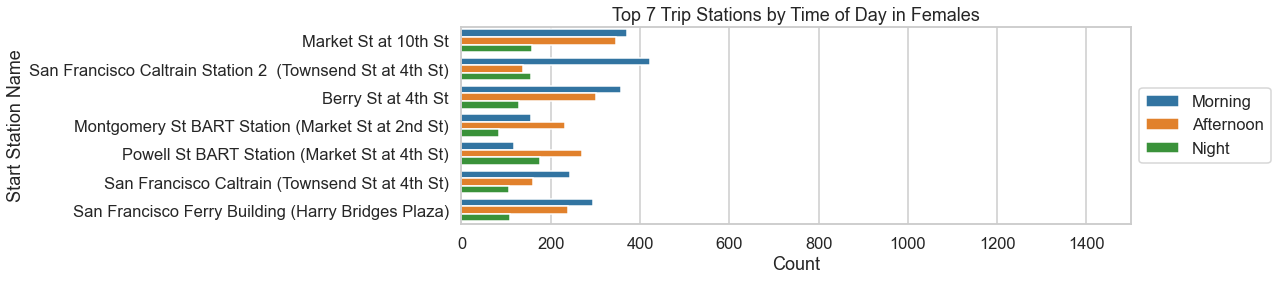

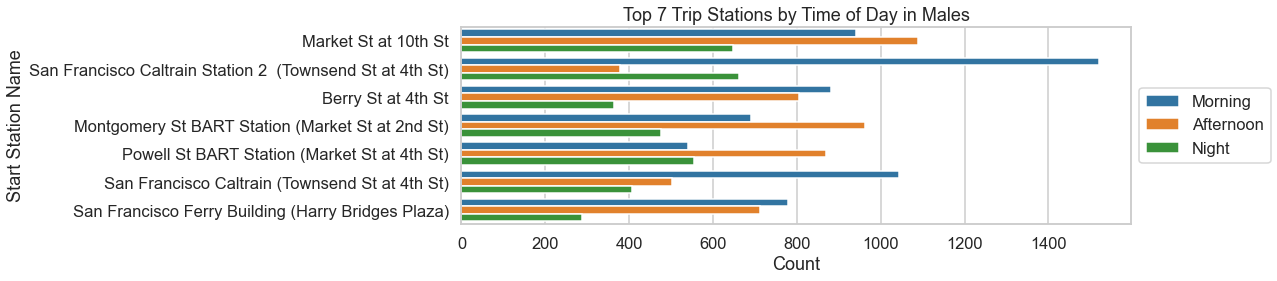

In [384]:
# Top 7 trip stations by times in each gender
# 3 categorical variables using countplot: Time of day
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.xlim([0, 1500])
plt.ylabel('Start Station Name')
plt.figure(figsize=(12,8))
ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');
#plt.savefig('image21.png');

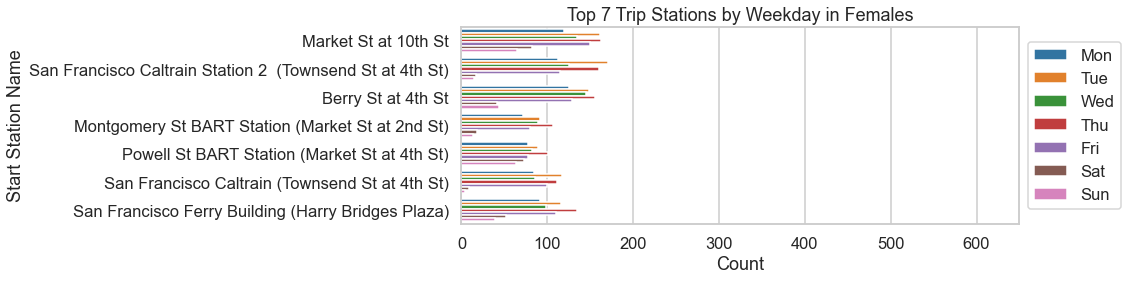

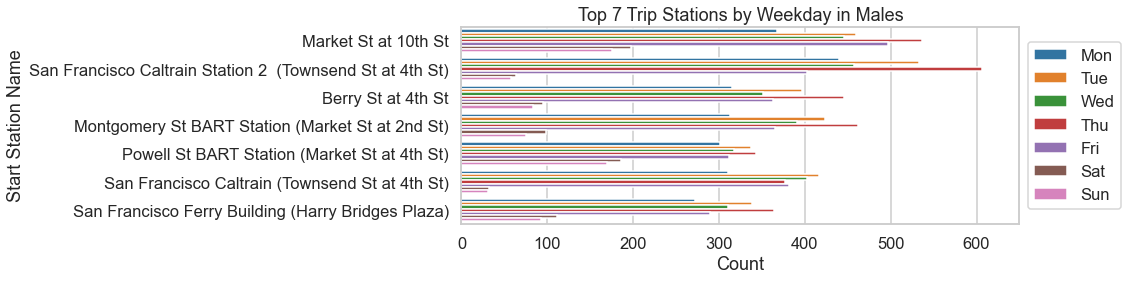

In [385]:
#  3 categorical variables using countplot: Weekday
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekday in Females')
plt.xlabel('Count')
plt.xlim([0, 650])
plt.ylabel('Start Station Name')
plt.figure(figsize=(10,8))
ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekday in Males')
plt.xlabel('Count')
plt.xlim([0, 650])
plt.ylabel('Start Station Name');
#plt.savefig('image21.png');

After checking time of day and weekdays, 
females have most trips in the morning
it is hard to tell any distinct trends between females and males. It needs to be investigated deeper and get more information.

### Features strengthen each other in terms of looking at locations and times
Separating user types, customers and subscribers, displays more information from location and time. Customers might be tourists who like to use a bike during the weekend. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays and afternoon.

In [386]:
!jupyter nbconvert exploration_slids.ipynb --to slides  --no-input --no-prompt



[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook exploration_slids.ipynb to slides
[NbConvertApp] Writing 1073782 bytes to exploration_slids.slides.html
